# Basic Bokeh Plots

In order to create more dynamic, fluid plots that will help us visualize and explain our data we will explore the use of interactive plots. As opposed to a normal, static plots, with interactive plots the user can use buttons, sliders, or filters in order to quickly and simply change the data and the format of the plot. This can be useful when explaining data to a third party and helping them learn to understand the data better themself. Interactive plots are useful on webapages and is a  simple, advance method that is helpful in understanding better the data one has been given.

Bokeh plots are like a recipe where we will instantiate our plot, add all the separate components onto our plot, and then finally we will show our plot in a new window. This requires active connection as the plots are interactive and allow for scrolling, zooming, and other widget features such as filtering through drop down menus.

### Install Bokeh

pip install bokeh

### Import

In [1]:
from bokeh.plotting import output_file, figure, show

Output_file will allow us to output our plot in a new window.
Figure is what we will use to instantiate our plot and add components on.
Show displays our put together plot.

# Basic Line Plot

In [2]:
output_file('practice.html')

p=figure(title='Practice')

p.line([1,2,3,4,5],[6,7,4,2,1], line_width=3)

show(p)

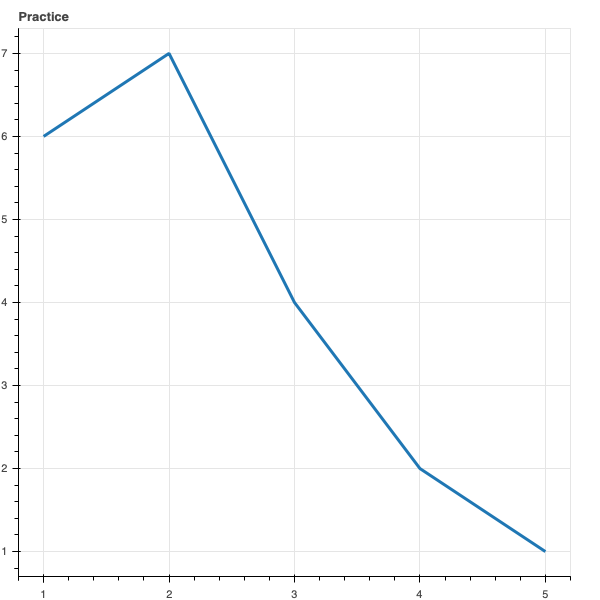

# Import Data

For this project I used NBA data which was pulled from nbareference.com

In [3]:
import pandas as pd
import requests

In [4]:
url='https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]
df=pd.DataFrame(df)
pd.set_option('display.max_columns', None)
df['FreeThrowPercentage']=df['FT%']

In [5]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FreeThrowPercentage
0,1,Steven Adams,C,26,OKC,22,22,27.3,4.8,7.9,.609,0.0,0.0,.000,4.8,7.9,.613,.609,1.5,3.0,.515,3.2,6.3,9.5,2.8,0.5,1.3,1.4,2.0,11.2,.515
1,2,Bam Adebayo,C,22,MIA,26,26,33.8,5.7,9.8,.584,0.0,0.3,.125,5.7,9.5,.599,.586,3.7,5.7,.651,2.6,8.0,10.6,4.6,1.4,1.2,2.9,2.7,15.2,.651
2,3,LaMarcus Aldridge,C,34,SAS,23,23,33.4,7.6,15.1,.500,0.6,1.7,.342,7.0,13.5,.519,.519,3.1,3.8,.816,2.0,5.1,7.1,2.4,0.6,1.8,1.6,2.2,18.8,.816
3,4,Nickeil Alexander-Walker,SG,21,NOP,22,0,13.7,2.2,6.7,.331,1.2,3.6,.342,1.0,3.1,.319,.422,0.5,0.7,.688,0.2,2.0,2.1,1.8,0.4,0.1,1.1,1.2,6.2,.688
4,5,Grayson Allen,SG,24,MEM,13,0,18.9,2.9,7.1,.413,1.2,3.3,.349,1.8,3.8,.469,.495,1.2,1.3,.882,0.2,2.8,2.9,1.5,0.4,0.1,1.2,1.6,8.2,.882


# Create Plot

We will first create a generic scatterplot and then break down the componenets so we can better understand what is going on.

In [6]:
from bokeh.models import ColumnDataSource

In [7]:
colors =  {'C': "Yellow", 'SG': "green", 'PF': "blue", 'SF': "purple",'PG':'Red'}

df1 = pd.DataFrame(df['Pos'])

df['color']=df['Pos'].map(colors)

In [8]:
from bokeh.plotting import output_file, figure, show
from bokeh.models import HoverTool
import bokeh.models as bmo

source=ColumnDataSource(df)

# output the plot to an HTML file, will open in a new window

output_file("nbapractice.html")

p = figure(title='Age vs. Free Throw Percentage',tools='hover')

p.circle(source=source, x='Age', y='FreeThrowPercentage',color='color',legend='Pos')

hover = p.select(dict(type=HoverTool))

hover.tooltips = [("Player", "@Player"), ("Age", "@Age"),  ("FT", '@FT'),("FTA", '@FTA'),("FreeThrowPercentage", '@FreeThrowPercentage')]

hover.mode = 'mouse'

show(p)

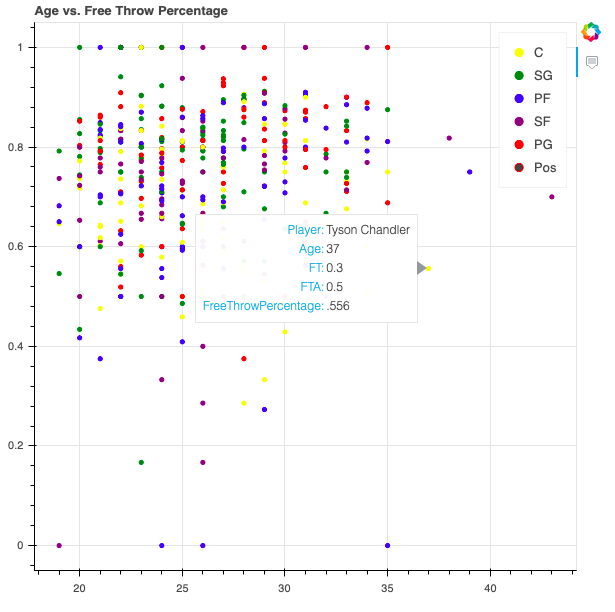

# Break Down the Components

#### source=ColumnDataSource(df)

ColumnDataSource is the object where the data of a Bokeh graph is stored. 
You could just directly reference your data from your data frame or wherever it is housed, which will work for simple plots. When adding more advanced features, certain glyphs or widgets, like a hover tool for example, you will need to house your data with ColumnDataSource. The argument within the plot is source= and we will state that our ColumnDataSource is our dataframe (df). Then, when we reference specific variables it will look for those variable names among the columns of our data frame.

#### output_file("nbapractice.html")

Bokeh will output the chart to a new window with the name being the title inside the parentheses. In this case nbapractive.html

#### p = figure(title='Age vs. Free Throw Percentage',tools='hover')

Here we are instantiating our model. In this case we add in the title name and we tell our plot that we will be adding in a hover tool. There are various tools that could be added, in this case we tell our model we will use a hover tool and then we will build that tool in the following rows. We will add on various components after it has been instantiated.

#### p.circle(source=source,x='Age', y='FT%',color='color',legend='Pos')

We are referencing our figure (p), to which we are calling the attribute circle, which will create a scatterplot of circles on our chart. The argument source=source tells us that the data we will be using is that previously set up with ColumnDataSource. Our x variable in this case is Age and y is Free Throw %. A unique color has been previously mapped to each position (C, PG, SG, SF, PF) and will color the different players according to their position. A legend will then be placed which will tell us which position has been given which color.

#### hover = p.select(dict(type=HoverTool))

#### hover.tooltips = [("Player", "@Player"), ("Age", "@Age"),  ("FT", '@FT'),("FTA", '@FTA'),("FreeThrowPercentage", '@FreeThrowPercentage')]

#### hover.mode = 'mouse'

The first hover step tells our model that we will be adding a hover tool to our plot, p. The type, inside the parentheses is HoverTool, was previously imported along with the other tools.

We then tell the hover tool which data to highlight when hovering over a specific point. In this case we want the hover to tell us the players name, age, number of free throws made on average per game, number of free throws attempted on average per game, and the players free throw percentage.

For example ("Player", "@Player") The "Player" will simply display 'Player' and '@Player' will change for every player in the dataframe since it carries the @ symbol before 'Player', the title of the column in our dataframe.

The bottom step tells us that the hover will be activated when we hover with our mouse. 

In [9]:
from bokeh.plotting import output_file, figure, show
from bokeh.models import HoverTool
import bokeh.models as bmo

source=ColumnDataSource(df)

# output the plot to an HTML file, will open in a new window

output_file("nbapractice.html")

p = figure(title='Age vs. Free Throw Percentage',tools='hover')

p.circle(source=source, x='Age', y='FreeThrowPercentage',color='color',legend='Pos')

hover = p.select(dict(type=HoverTool))

hover.tooltips = [("Player", "@Player"), ("Age", "@Age"),  ("FT", '@FT'),("FTA", '@FTA'),("FreeThrowPercentage", '@FreeThrowPercentage')]

hover.mode = 'mouse'

show(p)

# Slider Example with Trigonometric Functions

In [1]:
import pandas as pd
import numpy as np
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

output_file("slider.html", title="slider.py example")

show(layout)

## https://docs.bokeh.org/en/latest/docs/gallery/slider.html

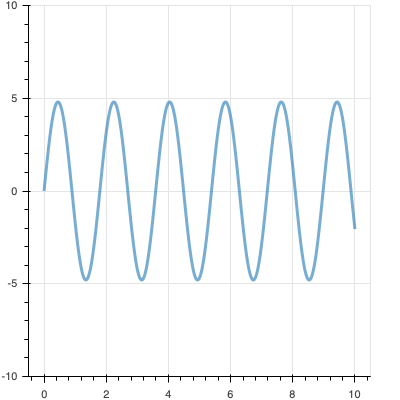

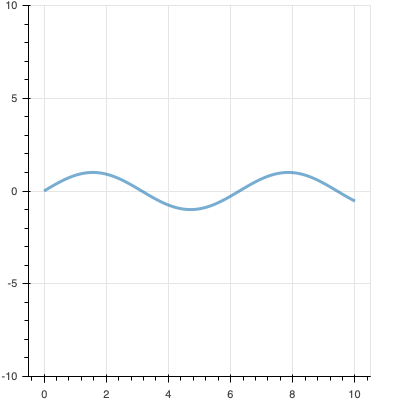

Most of the features of the plot are similiar to those above. The different parts are that these plots include a slider which will filter the data and thus actively change the plot.

#### amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
#### freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
#### phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
#### offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

The code above establishes ranges for the sliders, steps, and names to be placed on each slider.

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)

freq_slider.js_on_change('value', callback)

phase_slider.js_on_change('value', callback)

offset_slider.js_on_change('value', callback)



The code above instantiates a callback, which will change value when the sliders are adjusted. The callback, when adjusted by the slider, will then directly affect the plot by changing the values in the data itself.

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

The code above affects the visual layout of the plot and where the sliders are placed/in what order.

# Conclusion

Bokeh is popular in creating interactive plots and has more of a Java Script feel to it. It is useful in creating plots that could be used on websites or other web applications to give users a hands on way of interacting with the data. 
In this tutorial we passed over some of the basic bokeh components and what they do within each plot. Bokeh has many widgets that can be added to different plots in order to fit to the data and customize the feel of the plot.